# Clustering exercise based on US Census Data

## This is VERY similar to the type of data you'd see in practice for segmentation

#### Note: I gave you thought starters and a process to follow, but you'll need to make some changes before the code will run

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 1) Load our data and check that everything looks clean

- US Census data
- From all states
- "Label" is income, which is either greater or less than 50k
- Check for missing data
- Make sure you understand what each of the features means

In [2]:
data = pd.read_csv('data/adult_income.csv', na_values=[' ?'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         30725 non-null object
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [4]:
# we don't know why the NAs are missing
# did they just choose not to answer? are they unemployed?
# in practice, this is very important and you should talk to a domain expert!


# drop all NAs for this lab
# YOUR CODE HERE

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
age               30162 non-null int64
workclass         30162 non-null object
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
income            30162 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
# I don't like dashes
# replace the dashes in the column names with underscores (_)

# YOUR CODE HERE

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
age               30162 non-null int64
workclass         30162 non-null object
education         30162 non-null object
education_num     30162 non-null int64
marital_status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital_gain      30162 non-null int64
capital_loss      30162 non-null int64
hours_per_week    30162 non-null int64
native_country    30162 non-null object
income            30162 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


## Theory Note:

- k means clustering works best with numerical features, especially when normally distributed
- "performance" will decline with lots of categorical features, so try to minimize their usage
- k modes clustering is available for categoricals

In [8]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
# data cleaning question: any thoughts here?
data['workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [10]:
# we will only use age, education_num columns for this example
example = # YOUR CODE HERE

In [11]:
example.shape

(30162, 2)

In [12]:
# we are only going to take 10k samples for sake of speed
# for the in-class demo
example = example.sample(10000, random_state=7)

In [13]:
example.shape

(10000, 2)

### 2) Scale our features so we can send them to k-means

- Remember that all features must be scaled before we feed to k-means

#### Parameters:

- by default: centers the mean at 0
- by default: scales the variance to 1
- by default: keeps a copy of X

In [14]:
scale = StandardScaler()

In [15]:
# fit and transform in one step
X_scale = scale.fit_transform(example)

### 3) Apply k-means

[K-Means Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

#### Parameters:

- n_clusters: number of cluster centers we want
- max_iter: number of times we want k-means to keep refinding cluster centers before it stops (higher means the algo will take longer)
- n_init: number of separate times k-means will be run in an attempt to find best convergence (higher means will take longer)
- init: how/where to start cluster centers

In [16]:
%%time
km = KMeans(n_clusters=4, n_init=20, random_state=7)
cluster_labels = km.fit_predict(X_scale)

CPU times: user 296 ms, sys: 9.46 ms, total: 305 ms
Wall time: 307 ms


### 4) Look at cluster performance from a metric POV

- inertia: sum of distances of samples to their closest cluster center (this helps us gauge how good our clusters are by penalizing points that are far away) - smaller is better

Try playing with the parameters above to see how the inertia changes

In [17]:
# get the inertia
# lower numbers are better but no sense of a "good" number
print km.inertia_

6335.95651525


### Create a plot to demonstrate how inertia changes as we change k. What's the best k?

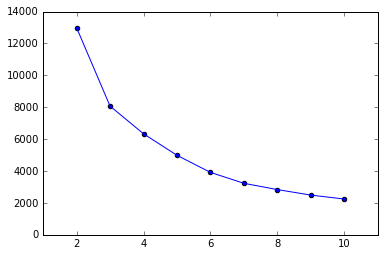

In [18]:
# look for the elbow!
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE

In [19]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters

# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. 
# Negative values generally indicate that a sample has been assigned to the wrong cluster, 
# as a different cluster is more similar.
from sklearn.metrics import silhouette_score
print silhouette_score(X_scale, cluster_labels)

0.443232739952


### Create a plot to demonstrate how silhouette_score changes as we change k. What's the best k?

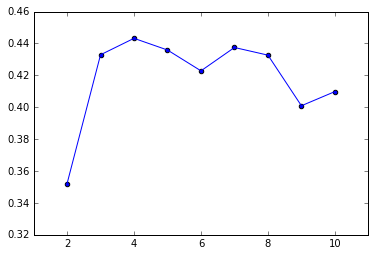

In [20]:
# YOUR CODE HERE

### 5) Look at cluster performance from an intuition POV

- What do our clusters mean intuitively?
- Can you think of a catchy name for each cluster?
- Where are they located?
- What do some of the people look like in each cluster?
- Try different values for n_clusters and see what works best. Why?

In [21]:
example.head()

,age,education_num
1870,40,6
12494,32,11
19798,45,13
19283,61,9
14693,30,10


In [ ]:
# get the cluster centers in the original scale
# this means you will have k cluster centers

km = KMeans(n_clusters=5, n_init=20, random_state=7)
km.fit(X_scale)
columns = {str(x): scale.inverse_transform(km.cluster_centers_[x]) for x in range(0,len(km.cluster_centers_))}
pd.DataFrame(columns, index=example.columns)

Your cluster names / intuition here

### Look at that: kmeans automatically identifies the "populations" within your data!

### 6) Look at some of the other features in the original data. Do you notice any problems? Should you include more?

- Which features might be useful?
- Which features might hurt performance?
- You don't have to rerun kmeans. Treat this as exploratory.

In [ ]:
# YOUR CODE HERE